# Part 4: SIFT Feature Matching with Geometric Transformations

This notebook creates a transformed version of the original image and explores SIFT feature matching between the original and transformed images to demonstrate the robustness of SIFT descriptors.

In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Original image loaded: (800, 640, 3)
Transformed image saved as 'example-image-transformed.jpg'


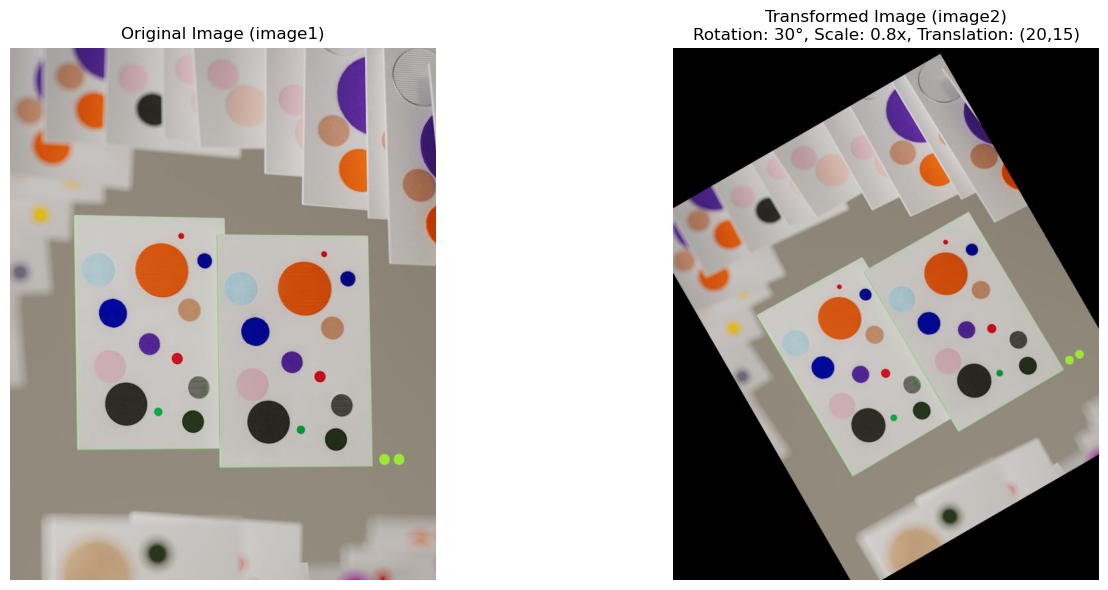


Transformation applied:
  - Rotation: 30 degrees clockwise
  - Scaling: 0.8x (80% of original size)
  - Translation: 20 pixels right, 15 pixels down


In [9]:
# Load the original image
image1 = cv2.imread('Image_processing/images/example-image.jpg')
if image1 is None:
    print("Error: Could not load the original image")
else:
    print(f"Original image loaded: {image1.shape}")

# Create geometric transformations
height, width = image1.shape[:2]
center = (width // 2, height // 2)

# Combined rotation + scaling + slight translation
rotation_angle = 30
scale_factor = 0.8
combined_matrix = cv2.getRotationMatrix2D(center, rotation_angle, scale_factor)
combined_matrix[0, 2] += 20  # Translate x by 20 pixels
combined_matrix[1, 2] += 15  # Translate y by 15 pixels

# Apply the combined transformation
image2 = cv2.warpAffine(image1, combined_matrix, (width, height))

# Save the transformed image
cv2.imwrite('Image_processing/images/example-image-transformed.jpg', image2)
print("Transformed image saved as 'example-image-transformed.jpg'")

# Display both images for comparison
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image (image1)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title(f'Transformed Image (image2)\nRotation: {rotation_angle}°, Scale: {scale_factor}x, Translation: (20,15)')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\nTransformation applied:")
print(f"  - Rotation: {rotation_angle} degrees clockwise")
print(f"  - Scaling: {scale_factor}x (80% of original size)")
print(f"  - Translation: 20 pixels right, 15 pixels down")

Detecting SIFT keypoints and computing descriptors...
Original image: 585 keypoints
Transformed image: 488 keypoints


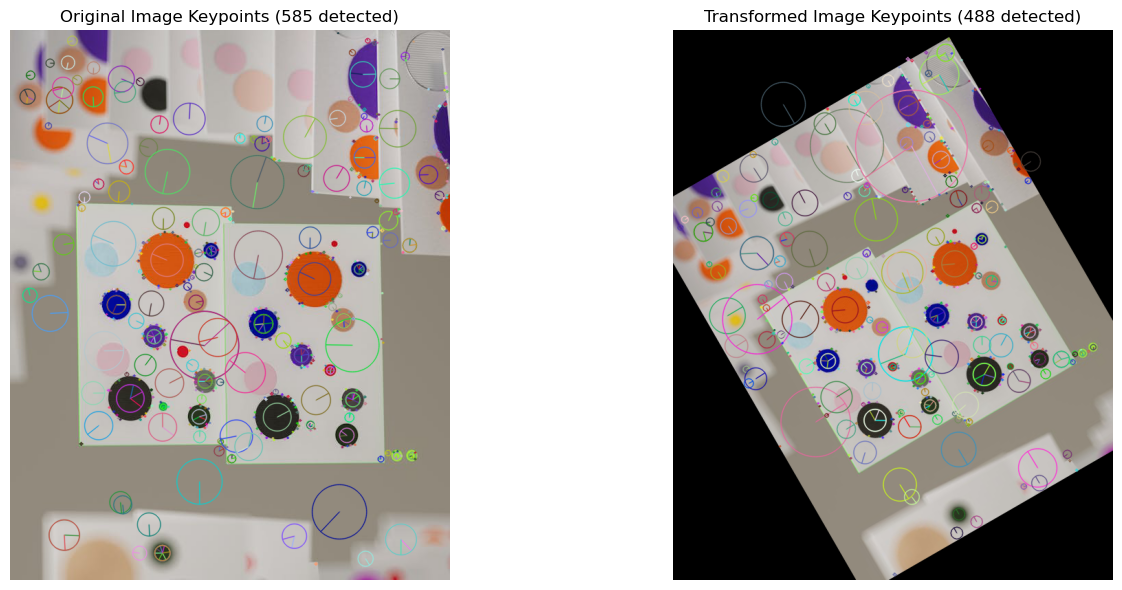

In [10]:
# Convert images to grayscale for SIFT processing
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector with optimized parameters from previous analysis
sift = cv2.SIFT_create(contrastThreshold=0.04, edgeThreshold=20)

# Detect keypoints and compute descriptors for both images
print("Detecting SIFT keypoints and computing descriptors...")
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

print(f"Original image: {len(keypoints1)} keypoints")
print(f"Transformed image: {len(keypoints2)} keypoints")

# Visualize keypoints on both images
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
img1_kp = cv2.drawKeypoints(image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB))
plt.title(f'Original Image Keypoints ({len(keypoints1)} detected)')
plt.axis('off')

plt.subplot(1, 2, 2)
img2_kp = cv2.drawKeypoints(image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB))
plt.title(f'Transformed Image Keypoints ({len(keypoints2)} detected)')
plt.axis('off')

plt.tight_layout()
plt.show()

Total matches: 225, Best distance: 14.000


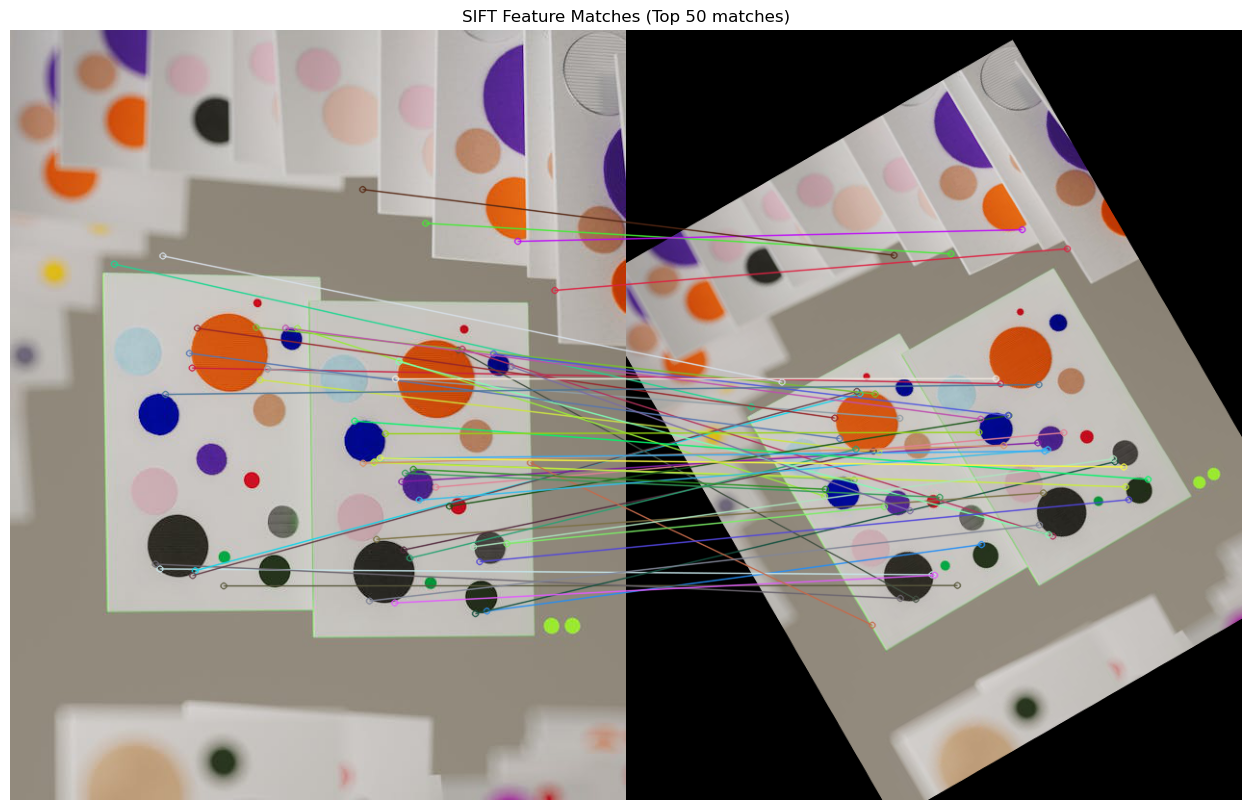

Distance range: 14.000 - 30.935
Average: 25.460, Std: 4.526
Complexity: 585×488×128 = 36,541,440 operations


In [11]:
# Brute-Force Matching and Visualization
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

print(f"Total matches: {len(matches)}, Best distance: {matches[0].distance:.3f}")

# Visualize top 50 matches
num_matches = min(50, len(matches))
matched_img = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, 
    matches[:num_matches], None, 
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title(f'SIFT Feature Matches (Top {num_matches} matches)')
plt.axis('off')
plt.show()

# Match quality analysis
top_distances = [matches[i].distance for i in range(num_matches)]
print(f"Distance range: {min(top_distances):.3f} - {max(top_distances):.3f}")
print(f"Average: {np.mean(top_distances):.3f}, Std: {np.std(top_distances):.3f}")

# Algorithm complexity
total_ops = len(descriptors1) * len(descriptors2) * 128
print(f"Complexity: {len(descriptors1)}×{len(descriptors2)}×128 = {total_ops:,} operations")